<a href="https://colab.research.google.com/github/guykert/public_TensorFlow_CSV/blob/main/clasificacion_imagenes_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# me conecto a la cuenta de google drive para poder acceder a los archivos

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# librería de cabecera para trabajar con matricesy vectores
import numpy as np
#framework para supervisar el aprendizaje de la red
import keras
# defino una variable con el backend de keras
from keras import backend as k
# Crear modelos de aprendizaje profundo donde se crea una instancia de la clase Sequential y se crean y agregan capas de modelo. 
from keras.models import Sequential
# al parecer estemodelo es un modelo precargado
from keras.layers import Activation
# al parecer estemodelo es un modelo precargado
from keras.layers.core import Dense, Flatten
# Optimizador que implementa el algoritmo Adam.

#La optimización de Adam es un método de descenso de gradiente estocástico que se basa en la estimación adaptativa de los momentos de primer y segundo orden. 
#Según el artículo Adam: un método para la optimización estocástica. 
#Kingma et al., 2014 , el método es " computacionalmente eficiente, tiene pocos requisitos de memoria, invariante para el reescalado diagonal de gradientes, 
#y es muy adecuado para problemas que son grandes en términos de datos / parámetros ".

from keras.optimizers import Adam

# Esto se utiliza para rotar las imagenes y tener una gama más alta de imagenes para el aprendizaje

# Documentación : https://enmilocalfunciona.io/tratamiento-de-imagenes-usando-imagedatagenerator-en-keras/

from keras.preprocessing.image import ImageDataGenerator
# esto es paratrabajar las imagenes.

#ejemplos para probar  : https://missinglink.ai/guides/keras/using-keras-flatten-operation-cnn-models-code-examples/

from keras.layers.convolutional import *
# librería de visualización de datos
from matplotlib import pyplot as plt

#Matriz de confusión

# Una matriz de confusión describe el rendimiento del modelo de clasificación. En otras palabras, 
#la matriz de confusión es una forma de resumir el rendimiento del clasificador. 

from sklearn.metrics import confusion_matrix

# Itertool de Python es un módulo que proporciona varias funciones que funcionan en iteradores para producir iteradores complejos. 
# Este módulo funciona como una herramienta rápida y eficiente en la memoria que se usa sola o en combinación para formar álgebra iteradora .

# Por ejemplo, supongamos que hay dos listas y desea multiplicar sus elementos. 
# Puede haber varias formas de lograr esto. Uno puede estar usando el enfoque ingenuo, es decir, 
# iterando a través de los elementos de la lista simultáneamente y multiplicándolos. 
# Y otro enfoque puede ser utilizar la función de mapa, es decir, 
# pasar el muloperador como primer parámetro a la función de mapa y Listas como el segundo y tercer parámetro a esta función. Veamos el tiempo que toma cada enfoque.


import itertools

# Matplotlib es una librería para generar gráficas a partir de datos contenidos en listas, vectores, 
# en el lenguaje de programación Python y en su extensión matemática NumPy.

# En estapágina hay un tutorial de estatema : https://pybonacci.org/2012/05/14/manual-de-introduccion-a-matplotlib-pyplot-i/

import matplotlib.pyplot as plt

%matplotlib inline

#Using theano backend



# libro con tutoriales :  https://torres.ai/deep-learning-inteligencia-artificial-keras/ 
# este git tiene los ejemplos :  https://github.com/jorditorresBCN/Deep-Learning-Introduccion-practica-con-Keras




# Curso de python : https://www.eumus.edu.uy/eme/ensenanza/electivas/python.html

Using TensorFlow backend.


In [ ]:
# Ruta raiz esta es la ruta donde se encuentran las carpetas dentro de drive
PATH = "/content/drive/My Drive/Colab Notebooks"

#Esta es la ruta datos de entrada
TRAINPATH = PATH + "/train"

# la carpeta de validación 
VALIDATIONPATH = PATH + "/validation"

# la carpeta de test 
TESTPATH = PATH + "/test"

# la carpeta de data_set 
DATA_SET = PATH + "/data_set"








In [ ]:
# flow_from_directory :  librería de keras para leer las imágenes de carpetas que contienen imágenes.

# El directory : debe establecerse en la ruta donde están presentes sus 'n' clases de carpetas.
# El target_size es el tamaño de las imágenes de entrada, cada imagen será redimensionada a este tamaño.
# color_mode: si la imagen es en blanco y negro o en escala de grises, configure “escala de grises” o si la imagen tiene tres canales de color, configure “rgb”.
# batch_size: número de imágenes que se generarán desde el generador por lote.
# class_mode: establezca "binario" si solo tiene dos clases para predecir, si no está configurado en "categórico", en caso de que esté desarrollando un sistema Autoencoder, tanto la entrada como la salida probablemente sean la misma imagen, para este caso a "entrada".
# shuffle: establezca Verdadero si desea barajar el orden de la imagen que se está produciendo, de lo contrario, configure Falso.
# seed: semilla aleatoria para aplicar el aumento aleatorio de la imagen y barajar el orden de la imagen.



# create a data generator
datagen = ImageDataGenerator()


# load and iterate training dataset
train_it = datagen.flow_from_directory(TRAINPATH, target_size=(32,32), class_mode = "categorical", shuffle = True, batch_size=25)
# load and iterate validation dataset
val_it = datagen.flow_from_directory(VALIDATIONPATH, target_size=(32,32), class_mode = "categorical", shuffle = True, batch_size=25)
# load and iterate test dataset
# test_it = datagen.flow_from_directory('data/test/', class_mode='binary', batch_size=64)


# train_batches = ImageDataGenerator().flow_from_directory(INPATH, target_size=(256,256), class_mode = "categorical", shuffle = True, batch_size=25)

Found 7574 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [ ]:
# separo las imagenes en los labels y las imagenes


train_images, train_labels = next(train_it)

def load_data():
  # with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
  #   #note the encoding type is 'Latin1'
  #   batch = pickle.load(file, encoding='latin1')

  features, labels = next(train_it)

  # features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
  # labels = batch['labels']

  return features, labels


#test_images, test_labels = next(train_batches)

#(train_images, train_labels), (test_images, test_labels) = train_batches

class_names = ['no_marcados','marcados']

#train_images = train_images.reshape((2, 3))


# train_images.shape

print(train_labels)

train_labels = train_labels[:,0:1]

train_labels = train_labels.reshape((1, -1))

train_labels = train_labels.astype(int)

train_labels = train_labels[0]

train_labels

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

test

type(ims[0]) is np.ndarray #True

ims #[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [254 254 254]
   [254 254 254]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [254 254 254]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [ 14  14  14]
   [241 241 241]
   [246 246 246]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [224 224 224]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [245 245 245]]]


 [[[255 255 255]
   [255 255 255]
   [254 254 254]
   ...
   [254 254 254]
   [254 254 254]
   [254 254 254]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [252 252 252]
   [253 253 253]
   [254 254 254]]

  [[253 253 253]
   [253 253 253]
   [254 254 254]
   ...


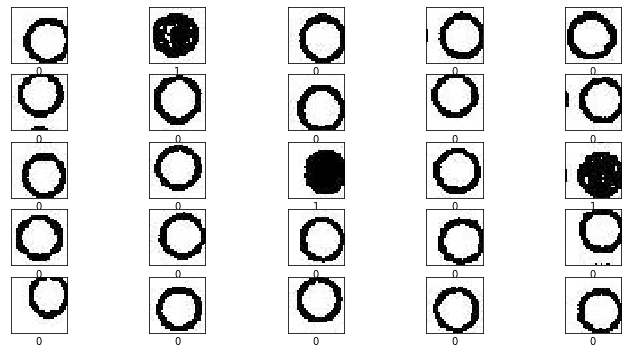

In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
  # Un objeto de matriz representa una matriz multidimensional y homogénea de elementos de tamaño fijo. 
  # Un objeto de tipo de datos asociado describe el formato de cada elemento en la matriz (su orden de bytes, cuántos bytes ocupa en la memoria, 
  # ya sea un número entero, un número de coma flotante u otra cosa, etc.)
  
  print('test')
  print('\ntype(ims[0]) is np.ndarray #{}'.format(type(ims[0]) is np.ndarray))

  if type(ims[0]) is np.ndarray:
    ims = np.array(ims).astype(np.uint8)

    print('\nims #{}'.format(ims))

    if (ims.shape[-1] != 3):
      ims = ims.transpose((0,2,3,1))

  f = plt.figure(figsize=figsize)
  cols = len(ims) //rows if len(ims) % 2 == 0 else len(ims)//rows + 1
  for i in range(len(ims)):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if titles is not None:
      sp.set_title(titles[i], fontsize=16)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(ims[i], interpolation=None if interp else 'none')
    #plt.imshow(ims[i][:, :, 0], interpolation=None if interp else 'none')
    plt.xlabel(titles[i])

# llamo alas funcion de plots y mando las imagenes y los labels
plots(train_images, titles=train_labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cantidad de imagenes 25. batch_id :  3  sample_id : 24.
0 <= sample_id True.

Stats of batch #3
# of Samples: 25

label_counts {0: 17, 1: 8}
['no_marcados', 'marcados']
Label Counts of [0](NO_MARCADOS) : 17
Label Counts of [1](MARCADOS) : 8

Example of Image 24 : 
Image - Min Value: 0.0 Max Value : 255.0
Image - Shape: (32, 32, 3)
Label - Label Id: 0 Name : no_marcados


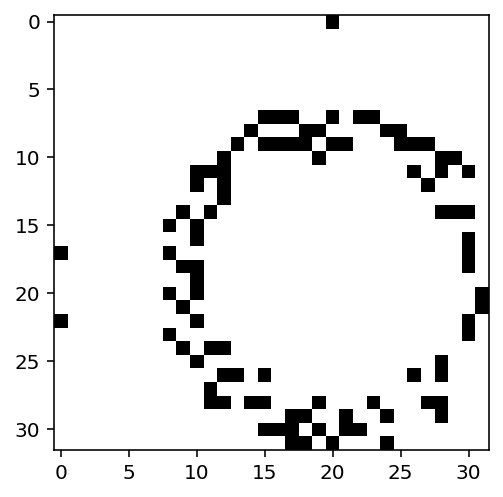

In [ ]:
import numpy as np
from PIL import Image
from io import BytesIO
from PIL import ImageEnhance
from PIL import Image as pil_image
import pickle






def load_label_names():
  return ['no_marcados','marcados']




def display_stats(batch_id, sample_id):
  features, labels = load_data()

  print('Cantidad de imagenes {}. batch_id :  {}  sample_id : {}.'.format(len(features), batch_id, sample_id))

  print('0 <= sample_id {}.'.format((0 <= sample_id)))

  if not (0 <= sample_id < len(features)):
    print('{} samples in batch {}. {} is out of range.'.format(len(features), batch_id, sample_id))
    return None

  print('\nStats of batch #{}'.format(batch_id))
  print('# of Samples: {}\n'.format(len(features)))

  label_names = load_label_names()


  labels = labels[:,0:1]

  labels = labels.reshape((1, -1))

  labels = labels.astype(int)

  labels = labels[0]
  
  label_counts = dict(zip(*np.unique(labels, return_counts = True)))



  print('label_counts {}'. format(label_counts))

  print(label_names)

  for key, value in label_counts.items():
    print('Label Counts of [{}]({}) : {}'. format(key, label_names[key].upper(), value))

  sample_image = features[sample_id]
  sample_label = labels[sample_id]

  print('\nExample of Image {} : ' . format(sample_id))
  print('Image - Min Value: {} Max Value : {}'.format(sample_image.min(), sample_image.max()))
  print('Image - Shape: {}'.format(sample_image.shape))
  print('Label - Label Id: {} Name : {}'.format(sample_label, label_names[sample_label]))

  plt.imshow(sample_image)


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

# explore the dataset
batch_id = 3
sample_id = 24
display_stats(batch_id, sample_id)




In [ ]:
def normalize(x):
  min_val = np.min(x)
  max_val = np.max(x)
  x = (x-min_val) / (max_val-min_val)
  return x

In [ ]:
def one_hot_encode(x):

  print(x)

  encoded = np.zeros((len(x), 10))

  for ids, val in enumerate(x):
    encoded[ids][val] = 1

  return encoded

In [ ]:
def _preprocess_and_save(normalize, one_hot_encode, features, labels, filename):

  # print('features.shape {}'. format(features.shape))


  features = normalize(features)


  # print('features2.shape {}'. format(features.shape))

  labels = one_hot_encode(labels)

  pickle.dump((features, labels), open(filename, 'wb'))

def preprocess_and_save_data(normalize, one_hot_encode):
  n_batches = 5
  valid_features =[]
  valid_labels = []

  for batch_i in range(1, n_batches + 1):
    features, labels = load_data()

    labels = labels[:,0:1]

    labels = labels.reshape((1, -1))

    labels = labels.astype(int)

    labels = labels[0]




    index_of_validation = int(len(features) * 0.1)

    _preprocess_and_save(normalize, one_hot_encode,
                         features[:-index_of_validation], labels[:-index_of_validation],
                         DATA_SET + '/preprocess_batch_' + str(batch_i) + '.p')
    
    valid_features.extend(features[-index_of_validation:])
    valid_labels.extend(labels[-index_of_validation:])

    # print(valid_features)

    #print('valid_features.shape {}'. format(valid_features.shape))

  _preprocess_and_save(normalize, one_hot_encode,
                        np.array(valid_features), np.array(valid_labels),
                        DATA_SET + '/preprocess_validation.p')
  
  # print(DATA_SET + '/test_batch.pickle')

  # with open(DATA_SET + '/test_batch.pickle', mode='rb') as file:
  #   batch = pickle.load(file, encoding='latin1')

  # test_features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
  # test_labels = batch['labels']

  test_features, test_labels = next(train_it)

  test_labels = test_labels[:,0:1]

  test_labels = test_labels.reshape((1, -1))

  test_labels = test_labels.astype(int)

  test_labels = test_labels[0]

  # print(test_features.shape)
  # print(labels)

  _preprocess_and_save(normalize, one_hot_encode,
                        np.array(test_features), np.array(test_labels),
                        DATA_SET + '/preprocess_training.p')

In [ ]:
# #Esto permite crear el archivo pickle


# pickle_out = open(DATA_SET + "/preprocess_validation.p","wb")
# example_dict = {}

# pickle.dump(example_dict, pickle_out)
# pickle_out.close()



In [ ]:
preprocess_and_save_data(normalize, one_hot_encode)

[1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0]
[0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0 1]
[0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
import pickle

valid_features, valid_labels = pickle.load(open(DATA_SET + '/preprocess_validation.p', mode='rb'))

print(valid_features.shape)
print(valid_labels)

(10, 32, 32, 3)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
import tensorflow as tf
# tf.reset_default_graph()

from tensorflow.python.framework import ops
ops.reset_default_graph()


x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='input_x')
y = tf.placeholder(tf.float32, shape=(None, 10), name='output_y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [ ]:
def conv_net(x, keep_prob):

  conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
  conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
  conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
  conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

  # 1, 2
  conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1, 1, 1, 1], padding='SAME')
  conv1 = tf.nn.relu(conv1)
  conv1_pool = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  conv1_bn = tf.layers.batch_normalization(conv1_pool)

  # 3, 4
  conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1, 1, 1, 1], padding='SAME')
  conv2 = tf.nn.relu(conv2)
  conv2_pool = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  conv2_bn = tf.layers.batch_normalization(conv2_pool)

  # 5, 6
  conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1, 1, 1, 1], padding='SAME')
  conv3 = tf.nn.relu(conv3)
  conv3_pool = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  conv3_bn = tf.layers.batch_normalization(conv3_pool)

  # 7, 8
  conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1, 1, 1, 1], padding='SAME')
  conv4 = tf.nn.relu(conv4)
  conv4_pool = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
  conv4_bn = tf.layers.batch_normalization(conv4_pool)

  # 9
  flat = tf.contrib.layers.flatten(conv4_bn)

  # 10
  full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
  full1 = tf.nn.dropout(full1, keep_prob)
  full1 = tf.layers.batch_normalization(full1)

  # 11
  full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
  full2 = tf.nn.dropout(full2, keep_prob)
  full2 = tf.layers.batch_normalization(full2)

  # 12
  full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
  full3 = tf.nn.dropout(full3, keep_prob)
  full3 = tf.layers.batch_normalization(full3)

  # 13
  full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
  full4 = tf.nn.dropout(full4, keep_prob)
  full4 = tf.layers.batch_normalization(full4)

  # 14
  out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)

  return out

In [ ]:
epochs = 5
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [ ]:
logits = conv_net(x, keep_prob)
model = tf.identity(logits, name='logits')

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [ ]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
  session.run(optimizer,
              feed_dict={
                  x: feature_batch,
                  y: label_batch,
                  keep_prob: keep_probability
              })

In [ ]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
  loss = sess.run(cost,
                  feed_dict={
                    x: feature_batch,
                    y: label_batch,
                    keep_prob: 1.
                  })
  
  valid_acc = sess.run(accuracy,
                  feed_dict={
                    x: valid_features,
                    y: valid_labels,
                    keep_prob: 1.
                  })
  
  print('Loss : {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))

In [ ]:
def batch_features_labels(features, labels, batch_size):

  for start in range(0, len(features), batch_size):
    end = min(start + batch_size, len(features))
    yield features[start:end], labels[start:end]

def load_preprocess_training_batch(batch_id, batch_size):
  filename = 'preprocess_batch_' + str(batch_id) + '.p'
  features, labels = pickle.load(open(filename, mode='rb'))
  print(features.shape)



  return batch_features_labels(features, labels, batch_size)

In [ ]:
save_model_path = DATA_SET + '/image_classification'

print('Training...')

with tf.Session() as sess:
  #Initializing the variables
  sess.run(tf.global_variables_initializer())

  #training cycle
  for epoch in range(epochs):
    #loop over all batches
    n_batches = 5
    for batch_i in range(1, n_batches + 1):
      for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
        print("batch_features.shape")
        #print(batch_labels)
        #train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)

      print(batch_i)
      # for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
      #   train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
      
      # print('Epoch {:>2}, CIFAR-10 Batch {}: ' . format(epoch + 1, batch_i), end='')
      # print_stats(sess, batch_features, batch_labels, cost, accuracy)

  #save Model
  # saver = tf.train.Saver()
  # save_path = saver.save(sess, save_model_path)

Training...
(23, 256, 256, 3)
batch_features.shape
1
(23, 256, 256, 3)
batch_features.shape
2
(23, 256, 256, 3)
batch_features.shape
3
(23, 256, 256, 3)
batch_features.shape
4
(23, 256, 256, 3)
batch_features.shape
5
(23, 256, 256, 3)
batch_features.shape
1
(23, 256, 256, 3)
batch_features.shape
2
(23, 256, 256, 3)
batch_features.shape
3
(23, 256, 256, 3)
batch_features.shape
4
(23, 256, 256, 3)
batch_features.shape
5
(23, 256, 256, 3)
batch_features.shape
1
(23, 256, 256, 3)
batch_features.shape
2
(23, 256, 256, 3)
batch_features.shape
3
(23, 256, 256, 3)
batch_features.shape
4
(23, 256, 256, 3)
batch_features.shape
5
(23, 256, 256, 3)
batch_features.shape
1
(23, 256, 256, 3)
batch_features.shape
2
(23, 256, 256, 3)
batch_features.shape
3
(23, 256, 256, 3)
batch_features.shape
4
(23, 256, 256, 3)
batch_features.shape
5
(23, 256, 256, 3)
batch_features.shape
1
(23, 256, 256, 3)
batch_features.shape
2
(23, 256, 256, 3)
batch_features.shape
3
(23, 256, 256, 3)
batch_features.shape
4
(23,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


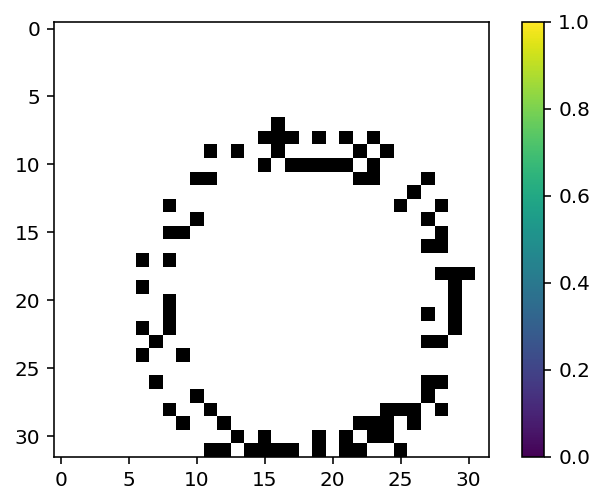

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

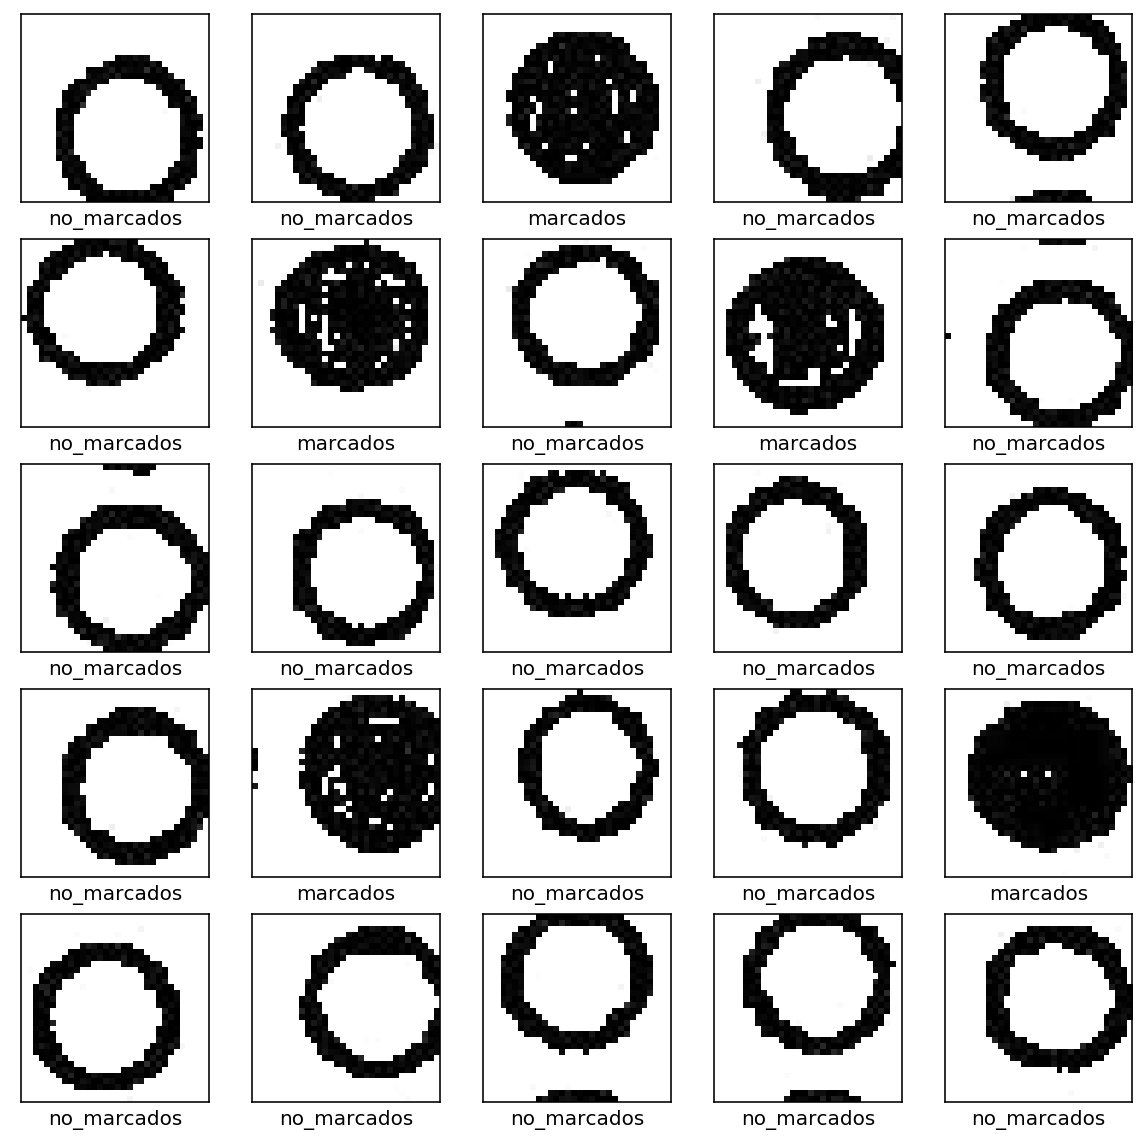

In [ ]:
train_images = train_images / 225.0

#test_images = test_images / 225.0

plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])



plt.show()

In [ ]:
#librería de maching lerning
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)

1.15.0


In [ ]:
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train_images = np.reshape(train_images, -1) 


#train_images = train_images.transpose((-1, 0, 1)) 

#train_images = train_images.convert("L")

input_shape = train_images.shape
input_shape
model.fit(train_images, train_labels, epochs=10)

ValueError: ignored